In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from scipy.optimize import curve_fit

%matplotlib inline

In [4]:
#file obtained by moving mpu9250 in infinity shape
df = pd.read_csv('../logs/calib_mag.txt', header=None, error_bad_lines=False, sep='\t')
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

b'Skipping line 1111: expected 7 fields, saw 8\nSkipping line 1113: expected 7 fields, saw 12\nSkipping line 1495: expected 7 fields, saw 11\nSkipping line 1717: expected 7 fields, saw 13\n'


In [5]:
df.columns = ['mx', 'my', 'mz', 'mxc', 'myc', 'mzc', 'T']

<AxesSubplot:>

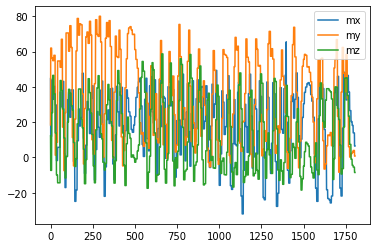

In [6]:
df[['mx', 'my', 'mz']].plot()

<AxesSubplot:xlabel='my'>

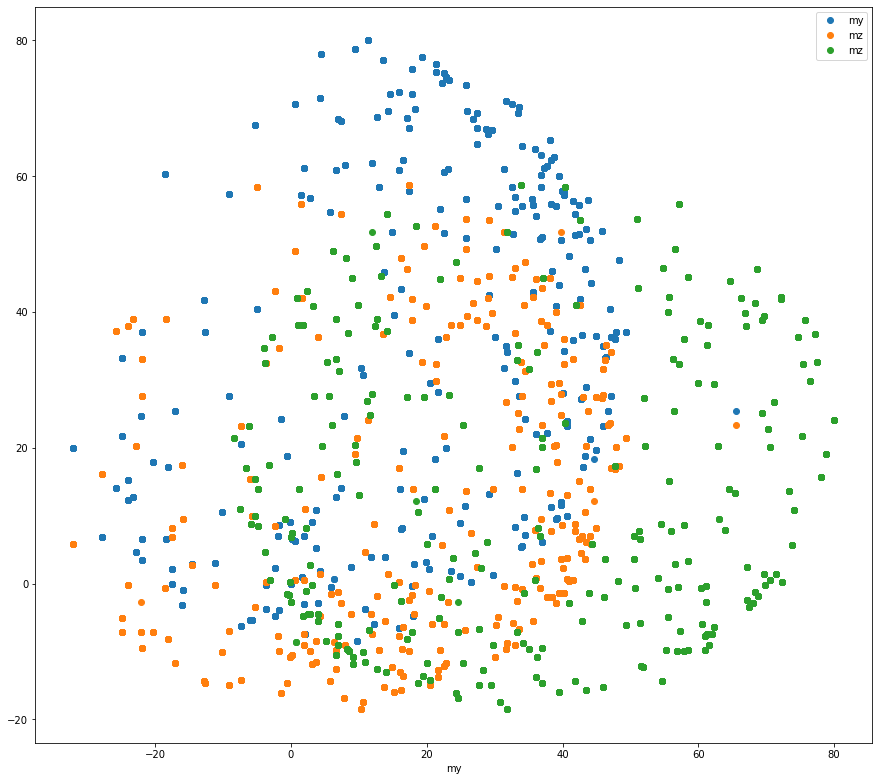

In [7]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111,aspect='equal')  
df[['mx', 'my']].plot(x='mx', y='my', linestyle='', marker='o', ax=ax)
df[['mx', 'mz']].plot(x='mx', y='mz', linestyle='', marker='o', ax=ax)
df[['my', 'mz']].plot(x='my', y='mz', linestyle='', marker='o', ax=ax)

<AxesSubplot:xlabel='myc'>

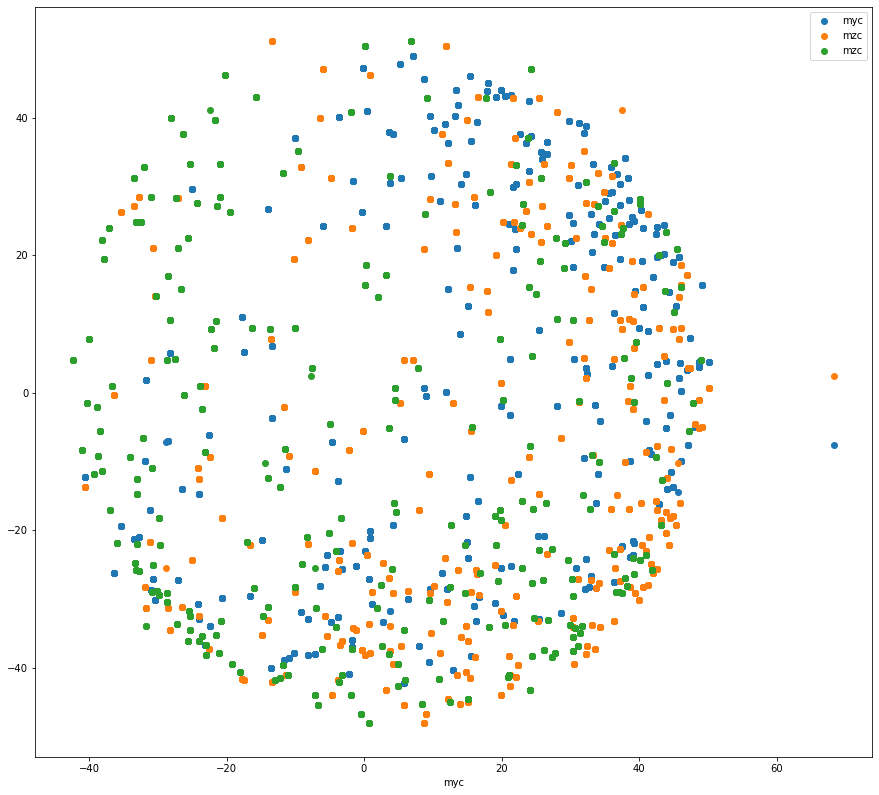

In [8]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111,aspect='equal')  
df[['mxc', 'myc']].plot(x='mxc', y='myc', linestyle='', marker='o', ax=ax)
df[['mxc', 'mzc']].plot(x='mxc', y='mzc', linestyle='', marker='o', ax=ax)
df[['myc', 'mzc']].plot(x='myc', y='mzc', linestyle='', marker='o', ax=ax)

<AxesSubplot:>

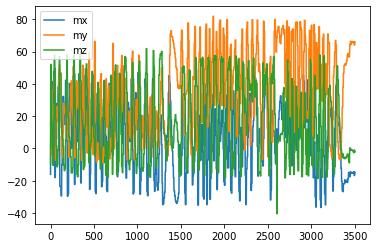

In [8]:
df[['mx', 'my', 'mz']].plot()

In [9]:
df = df[(df.mx < df.mx.quantile(.975)) & (df.mx > df.mx.quantile(.025))]
df = df[(df.my < df.my.quantile(.975)) & (df.my > df.my.quantile(.025))]
df = df[(df.mz < df.mz.quantile(.975)) & (df.mz > df.mz.quantile(.025))]

In [9]:
df[['mx', 'my', 'mz']].to_csv('../mag_extraction2023.txt', header=None, index=None, sep='\t')

magneto + https://www.ngdc.noaa.gov/geomag/calculators/magcalc.shtml#igrfwmm (47.0584 2023)

improvement could be : https://github.com/nliaudat/magnetometer_calibration

In [ ]:
mx_off = 5.844278
my_off = 35.734071
mz_off = 20.999700

mxx, mxy, mxz = 1.105472, -0.008269, -0.010815
myx, myy, myz = -0.008269, 1.076132, -0.029695
mzx, mzy, mzz = -0.010815, -0.029695, 1.214988

In [11]:
df['mx_off'] = df['mx'] - mx_off
df['my_off'] = df['my'] - my_off
df['mz_off'] = df['mz'] - mz_off

df['mxnc'] = mxx*df['mx_off'] + mxy*df['my_off'] + mxz*df['mz_off']
df['mync'] = myx*df['mx_off'] + myy*df['my_off'] + myz*df['mz_off']
df['mznc'] = mzx*df['mx_off'] + mzy*df['my_off'] + mzz*df['mz_off']

<AxesSubplot:xlabel='mync'>

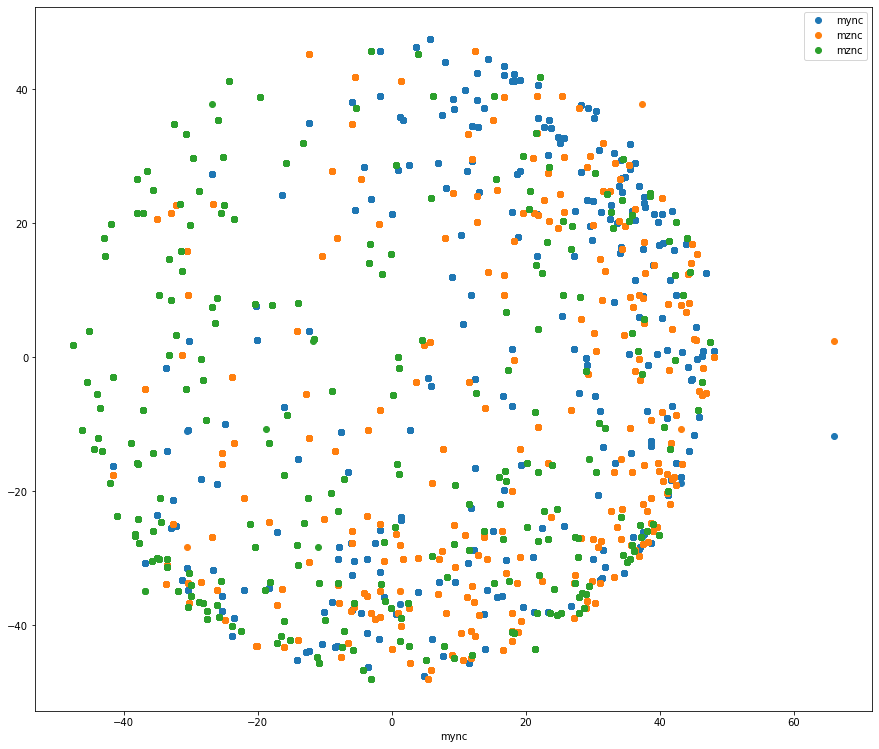

In [12]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111,aspect='equal')  
df[['mxnc', 'mync']].plot(x='mxnc', y='mync', linestyle='', marker='o', ax=ax)
df[['mxnc', 'mznc']].plot(x='mxnc', y='mznc', linestyle='', marker='o', ax=ax)
df[['mync', 'mznc']].plot(x='mync', y='mznc', linestyle='', marker='o', ax=ax)

In [13]:
arduino_code = """
  mx_off = mx - {};
  my_off = my - {};
  mz_off = mz - {};

  mx_cal = {}*mx_off + {}*my_off + {}*mz_off;
  my_cal = {}*mx_off + {}*my_off + {}*mz_off;
  mz_cal = {}*mx_off + {}*my_off + {}*mz_off;
""".format(mx_off, my_off, mz_off, mxx, mxy, mxz, myx, myy, myz, mzx, mzy, mzz)
print(arduino_code)


  mx_off = mx - 5.844278;
  my_off = my - 35.734071;
  mz_off = mz - 20.9997;

  mx_cal = 1.105472*mx_off + -0.008269*my_off + -0.010815*mz_off;
  my_cal = -0.008269*mx_off + 1.076132*my_off + -0.029695*mz_off;
  mz_cal = -0.010815*mx_off + -0.029695*my_off + 1.214988*mz_off;



In [ ]:
mx_off, my_off, mz_off, mxx, mxy, mxz, myx, myy, myz, mzx, mzy, mzz

In [95]:
import plotly.express as px
fig = px.scatter_3d(df, x='mxnc', y='mync', z='mznc')
fig.show()

In [97]:
fig = px.scatter_3d(df, x='ax', y='ay', z='az')
fig.show()

In [40]:
df[['ax', 'ay', 'az']].to_csv('../accel_extraction2.txt', header=None, index=None, sep='\t')

In [99]:
df['ax_off'] = df['ax'] - 5.215803
df['ay_off'] = df['ay'] - 7.472084
df['az_off'] = df['az'] - 2.745742

df['axnc'] = 0.938114*df['ax_off'] + -0.009494*df['ay_off'] + -0.026736*df['az_off']
df['aync'] = -0.009494*df['ax_off'] + 0.739802*df['ay_off'] + -0.099459*df['az_off']
df['aznc'] = -0.026736*df['ax_off'] + -0.099459*df['ay_off'] + 0.771585*df['az_off']

<AxesSubplot:xlabel='aync'>

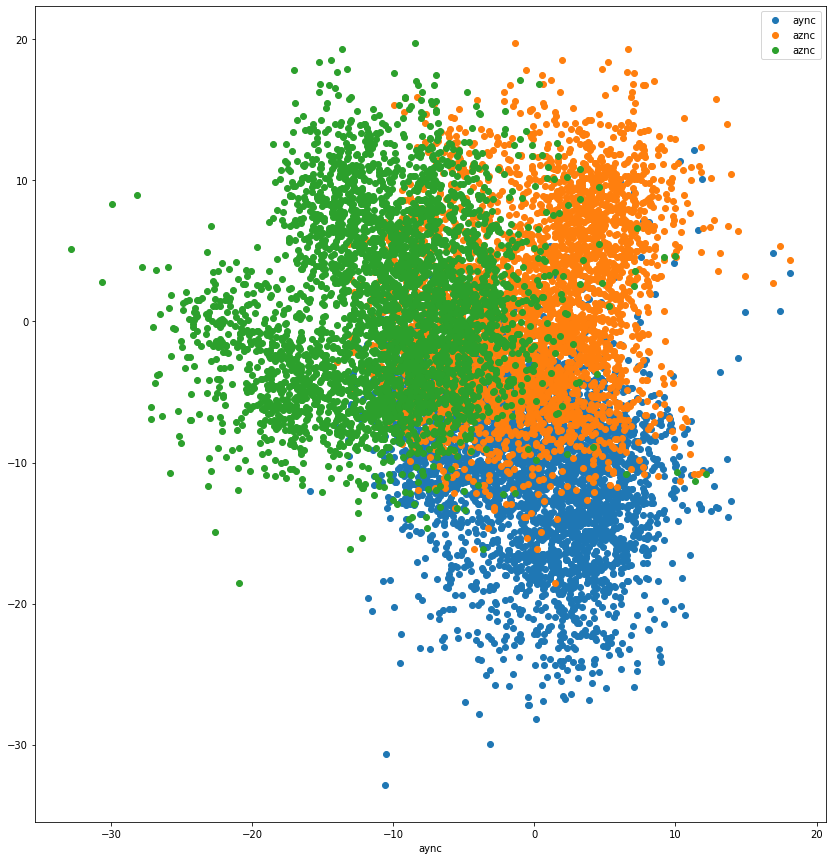

In [101]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111,aspect='equal')  
df[['axnc', 'aync']].plot(x='axnc', y='aync', linestyle='', marker='o', ax=ax)
df[['axnc', 'aznc']].plot(x='axnc', y='aznc', linestyle='', marker='o', ax=ax)
df[['aync', 'aznc']].plot(x='aync', y='aznc', linestyle='', marker='o', ax=ax)

<AxesSubplot:xlabel='ay'>

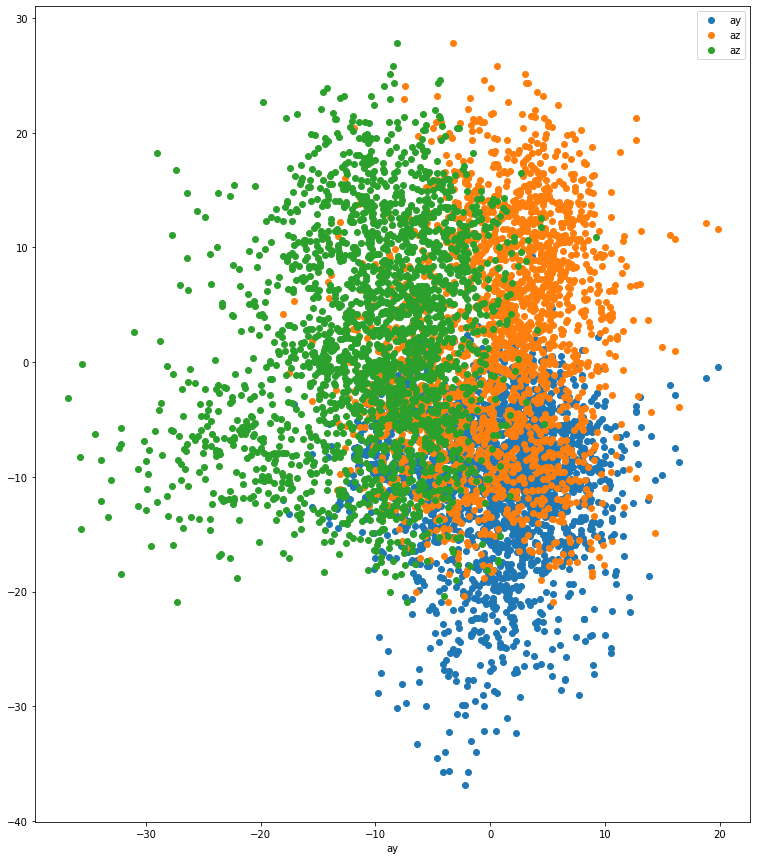

In [41]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111,aspect='equal')  
df[['ax', 'ay']].plot(x='ax', y='ay', linestyle='', marker='o', ax=ax)
df[['ax', 'az']].plot(x='ax', y='az', linestyle='', marker='o', ax=ax)
df[['ay', 'az']].plot(x='ay', y='az', linestyle='', marker='o', ax=ax)

In [103]:
df['axc'] = df.ax.apply(lambda d: accel_fit(d, *calibration_accel[0]))
df['ayc'] = df.ay.apply(lambda d: accel_fit(d, *calibration_accel[1]))
df['azc'] = df.az.apply(lambda d: accel_fit(d, *calibration_accel[2]))

<AxesSubplot:xlabel='ayc'>

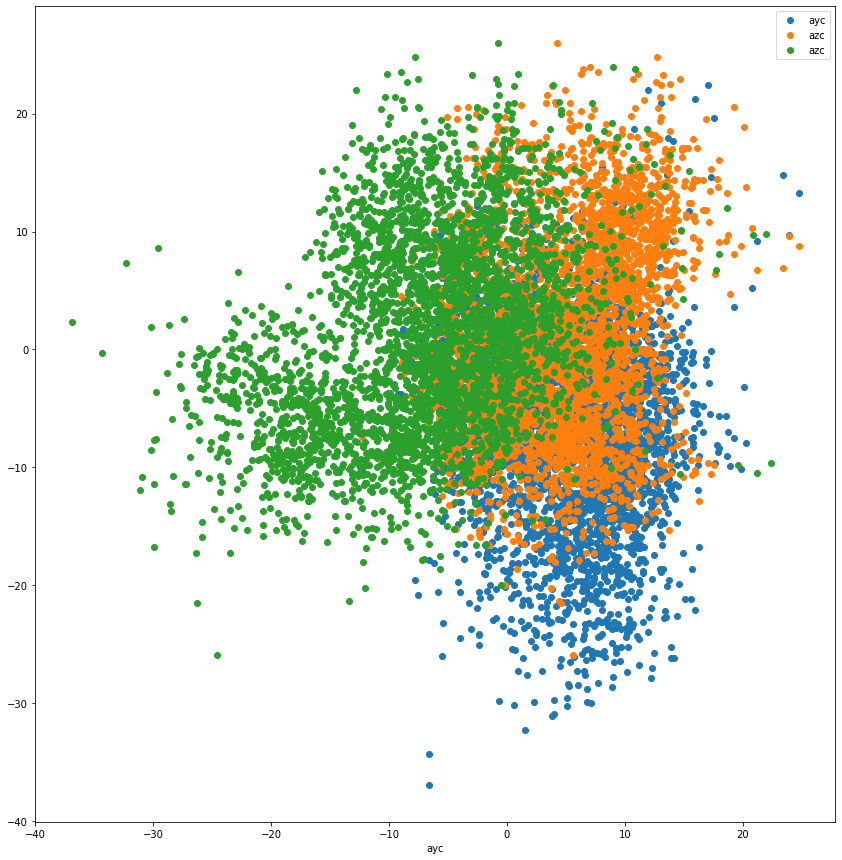

In [104]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111,aspect='equal')  
df[['axc', 'ayc']].plot(x='axc', y='ayc', linestyle='', marker='o', ax=ax)
df[['axc', 'azc']].plot(x='axc', y='azc', linestyle='', marker='o', ax=ax)
df[['ayc', 'azc']].plot(x='ayc', y='azc', linestyle='', marker='o', ax=ax)

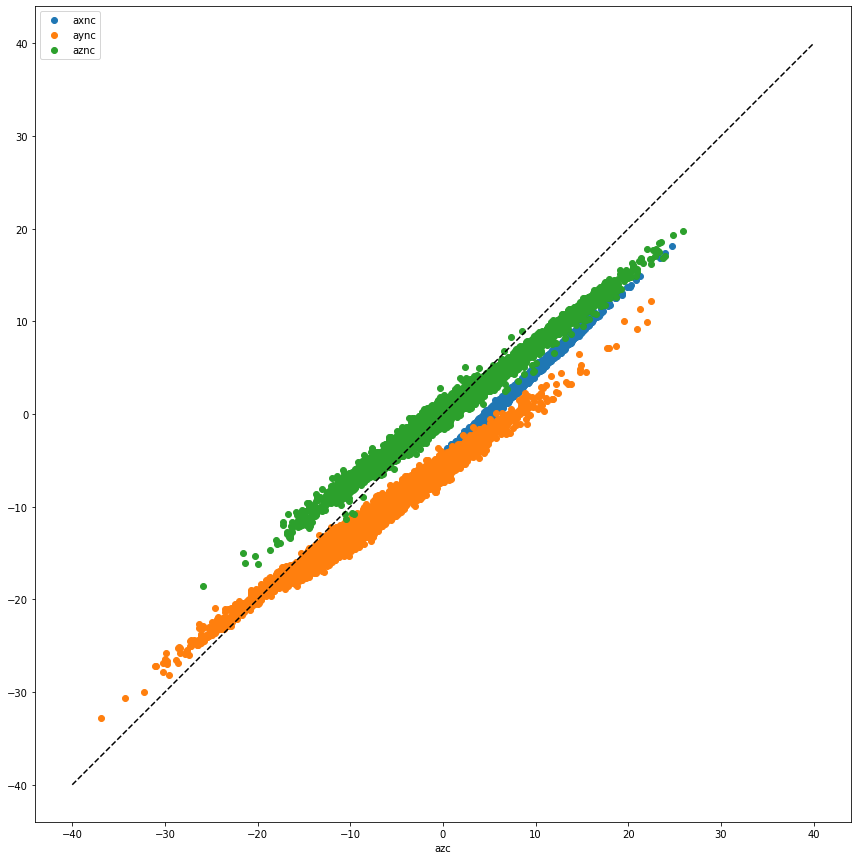

In [107]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111,aspect='equal')  
df[['axc', 'axnc']].plot(x='axc', y='axnc', linestyle='', marker='o', ax=ax)
df[['ayc', 'aync']].plot(x='ayc', y='aync', linestyle='', marker='o', ax=ax)
df[['azc', 'aznc']].plot(x='azc', y='aznc', linestyle='', marker='o', ax=ax)
plt.plot([-40, 40], [-40, 40], linestyle='dashed', color='k')

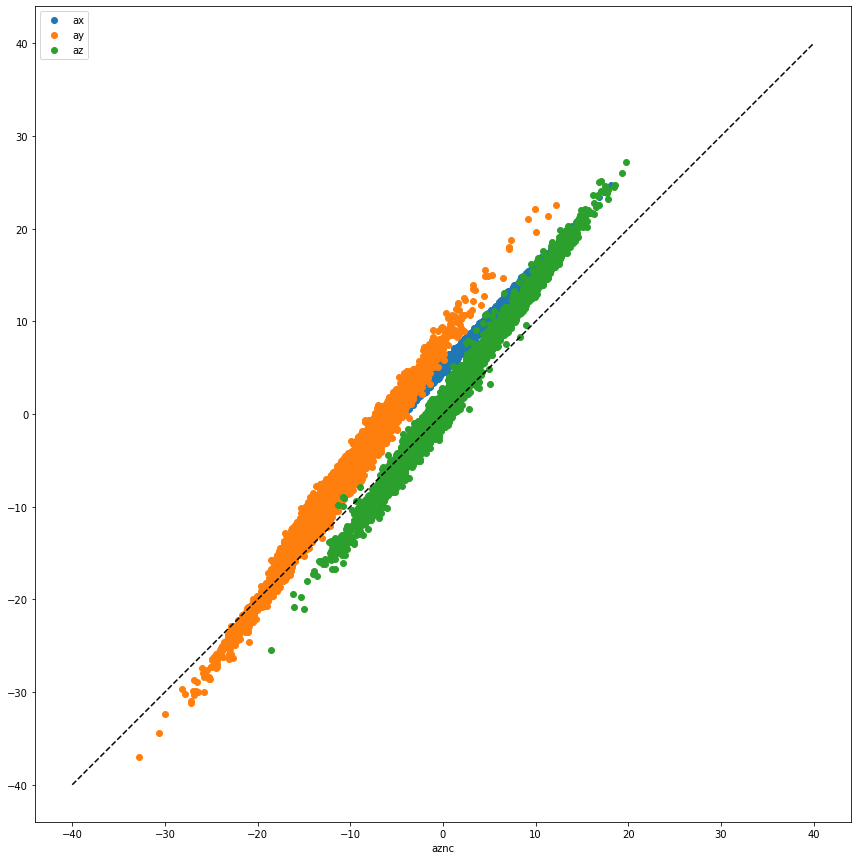

In [109]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111,aspect='equal')  
df[['axnc', 'ax']].plot(x='axnc', y='ax', linestyle='', marker='o', ax=ax)
df[['aync', 'ay']].plot(x='aync', y='ay', linestyle='', marker='o', ax=ax)
df[['aznc', 'az']].plot(x='aznc', y='az', linestyle='', marker='o', ax=ax)
plt.plot([-40, 40], [-40, 40], linestyle='dashed', color='k')

# to do : 
- nouvelle calibration du magno
- vérifier si la calibration gyro accel reste constante
- implémenter dans arduino les constantes si reste constant, sinon implémenter la calibration
- implémenter la double intégration de l'accéléro, la simple intégration du gyro, l'orientation du magnéto

https://github.com/nliaudat/magnetometer_calibration/blob/main/calibrate.py

In [72]:
22816.7*1e-5

0.22816700000000004